# IS362 Week 13 Assignment

Very often, we’re tasked with taking data in one form and transforming it for easier downstream analysis. In this assignment, you’ll use what you’ve learned in the course to prepare data for predictive analysis in Project 4.
Mushrooms Dataset. A famous—if slightly moldy—dataset about mushrooms can be found in the UCI repository here: https://archive.ics.uci.edu/ml/datasets/Mushroom. The fact that this is such a well-known dataset in the data science community has made it a good dataset to use for comparative benchmarking. For example, if someone was working to build a better decision tree algorithm (or other predictive classifier) to analyze categorical data, this dataset could be useful. In Project 4, we’ll use scikit-learn to answer the question, “Which other attribute or attributes are the best predictors of whether a particular mushroom is poisonous or edible?”

Your assignment is to
• First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!
• Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.
• Add meaningful names for each column.
• Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics.
• Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
• Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.

I'll start by importing the modules I will be using for this assignment

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

Now I will create a simple data frame so I can view the data we are working with. The most important data is stored in columns 3,5, and 9. Those are the Cap Color, Odor, and Gill Color categories. I will rename those columns that to reflect the names so the data is easier to understand. 

In [9]:
shroomdata = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',sep=',', header=None, usecols=[0,3,5,9], names=["Edible","Cap Color","Odor","Gill Color"])
shroomdata.head()

,Edible,Cap Color,Odor,Gill Color
0,p,n,p,k
1,e,y,a,k
2,e,w,l,n
3,p,w,p,n
4,e,g,n,k


The data is returned as letter values which isn't very helpful with identification. I will change that to a numeric value. 

The scales I will use are as follows:

"Edible" column: edible(e) = zero(0) and poisonous(p) = one(1).

"Cap Color" column: brown(n) = zero(0), buff(b) = one(1), cinnamon(c) = two(2), gray(g) = three(3), green(r) = four (4), pink(p) = five(5), purple(u) = six(6), red(e) = seven(7), white(w) = eight(8), yellow(y) = (9).

"Odor" column: almond(a) = zero(0), anise(l) = one(1), creosote(c) = two(2), fishy(y) = three(3), foul(f) = four(4), musty(m) = five(5), none(n) = six(6), pungent(p) = seven (7), spicy(s) = eight(8).

"Gill Color" column: black(k) = zero(0), brown(n) = one(1), buff(b) = two(2), chocolate(h) = three(3), gray(g) = four(4), green(r) = five(5), orange(o) = six(6), pink(p) = seven(7), purple(u) = eight(8), red(e) = nine(9), white(w) = ten(10), yellow(y) = eleven(11).

In [10]:
shroomdata.replace(to_replace={"Edible":{'p': 1, 'e': 0}}, inplace=True)
shroomdata.replace(to_replace={"Cap Color":{'n':0, 'b':1, 'c':2, 'g':3, 'r':4, 'p':5, 'u':6, 'e':7, 'w':8, 'y':9}}, inplace=True)
shroomdata.replace(to_replace={"Odor":{'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}}, inplace=True)
shroomdata.replace(to_replace={"Gill Color":{'k':0, 'n':1, 'b':2, 'h':3, 'g':4, 'r':5, 'o':6, 'p':7, 'u':8, 'e':9, 'w':10, 'y':11}}, inplace=True)

Now I will check the results to see if our data table can be understood using numeric values.

In [11]:
shroomdata.head()

,Edible,Cap Color,Odor,Gill Color
0,1,0,7,0
1,0,9,0,0
2,0,8,1,1
3,1,8,7,1
4,0,3,6,0


My headings are correct and my letter values are now corresponding to the numeric data that I have assigned them. 

I will now attempt to display this data using matplot in graphical form. First I will sort by edible and cap color values.

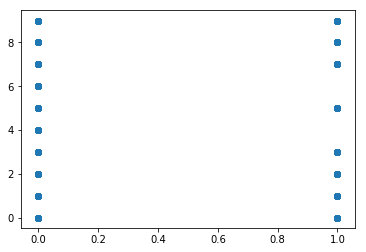

In [14]:
x = shroomdata["Edible"].values
y = shroomdata["Cap Color"].values

plt.scatter(x,y)

Examing this plot we see the data has been seperated by poisonous(1) and edible(0) according to cap color. What stands out the most is that although every edible mushroom comes in every cap color, the poisonous mushrooms do not come in cap colors of green(4) and purple(6).

I will now display this data by edible and odor values.

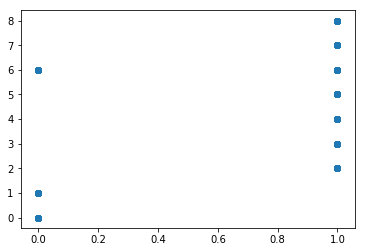

In [15]:
x = shroomdata["Edible"].values
y = shroomdata["Odor"].values

plt.scatter(x,y)

This sort of the data helps us identify mushrooms that are edible much more easily. While the no odor(6) could be edible or poisonous there are only two mushrooms with pleasant smells that are edible. The almond(0) and anise(1) smelling mushrooms are completely edible. This can point to a safe indication when looking for edible mushrooms.

My last sort will be done using the edible and gill color values.

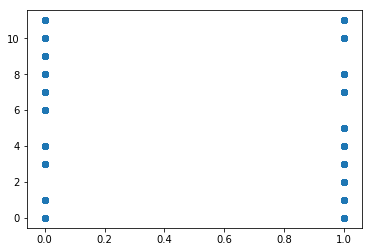

In [17]:
x = shroomdata["Edible"].values
y = shroomdata["Gill Color"].values

plt.scatter(x,y)

This diaplay is a bit more complex but we do have four data points that stand out. Are far as identifying non poisonous mushrooms we see that mushrooms with gill colors of orange(6) and red(9) are not going to be poisonous. While mushrooms with gil colors of chocolate(3) and green(5) will always be poisonous.

# Conclusion

When trying to determine the easiest way to find edible mushrooms it seems that the "odor" category is the most reliable. It had the least amount of overlap, which could cause confusion in the other categories. The "cap color" and "gill color" had way too many overlapping categories to rely on those features as a reliable method for identiying edible mushrooms.